# Laboratorium 2


### Konfiguracja

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as mcoll
import matplotlib.colors as mcolors
from matplotlib.widgets import Button
import json as js

class _Button_callback(object):
    def __init__(self, scenes):
        self.i = 0
        self.scenes = scenes

    def set_axis(self, ax):
        self.ax = ax
        
    def next(self, event):
        self.i = (self.i + 1) % len(scenes)
        self.draw()

    def prev(self, event):
        self.i = (self.i - 1) % len(scenes)
        self.draw()
        
    def draw(self):
        self.ax.clear()
        for collection in scenes[self.i].points:
            if len(collection.points) > 0:
                self.ax.scatter(*zip(*(np.array(collection.points))), c=collection.color, marker=collection.marker)
        for collection in scenes[self.i].lines:
            self.ax.add_collection(collection.get_collection())
        self.ax.autoscale()
        plt.draw()

### Interfejsy

[Dostępne kolory](https://matplotlib.org/3.1.1/gallery/color/named_colors.html)

[Dostępne znaczniki punktów](https://matplotlib.org/3.1.1/api/markers_api.html#module-matplotlib.markers)

In [65]:
class Scene:
    def __init__(self, points=[], lines=[]):
        self.points=points
        self.lines=lines

class PointsCollection:
    def __init__(self, points = [], color = None, marker = None):
        self.points = np.array(points)
        self.color = color
        self.marker = marker

class LinesCollection:
    def __init__(self, lines = [], color = None):
        self.color = color
        self.lines = lines
        
    def add(self, line):
        self.lines.append(line)
        
    def get_collection(self):
        if self.color:
            return mcoll.LineCollection(self.lines, colors=mcolors.to_rgba(self.color))
        else:
            return mcoll.LineCollection(self.lines)
            


class Plot:
    def __init__(self, scenes = [], json = None):
        if json is None:
            self.scenes = scenes
        else:
            self.scenes = [Scene([PointsCollection(pointsCol) for pointsCol in scene["points"]], 
                                 [LinesCollection(linesCol) for linesCol in scene["lines"]]) 
                           for scene in js.loads(json)]
        
    def __configure_buttons(self, callback):
        plt.subplots_adjust(bottom=0.2)
        axprev = plt.axes([0.6, 0.05, 0.15, 0.075])
        axnext = plt.axes([0.76, 0.05, 0.15, 0.075])
        bnext = Button(axnext, 'Następny')
        bnext.on_clicked(callback.next)
        bprev = Button(axprev, 'Poprzedni')
        bprev.on_clicked(callback.prev)
        return [bprev, bnext]

    def draw(self):
        plt.close()
        callback = _Button_callback(self.scenes)
        self.widgets = self.__configure_buttons(callback)
        callback.set_axis(plt.axes())
        plt.show()
        callback.draw()
        
    def toJSON(self):
        return js.dumps([{"points": [pointCol.points.tolist() for pointCol in scene.points], 
                          "lines":[linesCol.lines for linesCol in scene.lines]} 
                         for scene in self.scenes])
    

### Przykład użycia

<IPython.core.display.Javascript object>


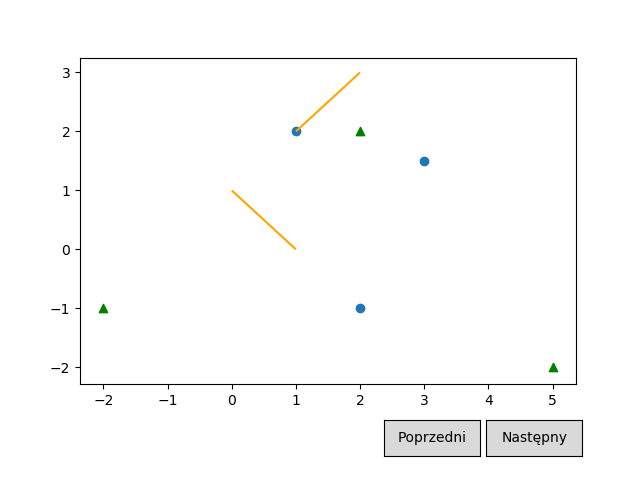

In [66]:
%matplotlib notebook

scenes=[Scene([PointsCollection([(1, 2), (3, 1.5), (2, -1)]), 
               PointsCollection([(5, -2), (2, 2), (-2, -1)], 'green', marker = "^")], 
              [LinesCollection([[(1,2),(2,3)], [(0,1),(1,0)]], 'orange')]), 
        Scene([PointsCollection([(1, 2), (-15, 1.5), (2, -1)], 'red'), 
               PointsCollection([(5, -2), (2, 2), (-2, 1)], 'black')], 
              [LinesCollection([[(-1,2),(-2,3)], [(0,-1),(-1,0)]])])]

plot = Plot(scenes)
plot.draw() 


### Rozwiązanie

<IPython.core.display.Javascript object>


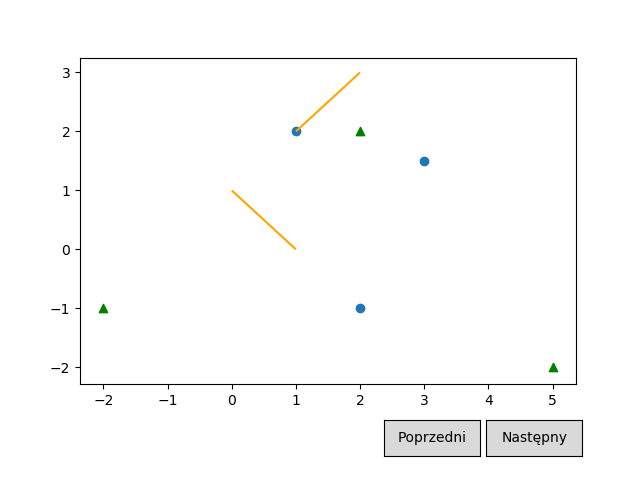

In [67]:
import random
import math
%matplotlib notebook

def draw_points(points):
    scenes=[Scene([PointsCollection(points)])]
    plot = Plot(scenes)
    plot.draw() 
    

points_a = []
for i in range(100):
    points_a.append((random.random()*200 - 100, random.random()*200 - 100))

    
points_b = []
for i in range(100):
    point_angle = random.random() * math.pi * 2
    points_b.append((math.cos(point_angle)*10, math.sin(point_angle)*10))


points_c = []
for i in range(100):
    side = random.randint(0,3)
    if side == 0:
        points_c.append((-10, random.random()*20 - 10))
    elif side == 1:
        points_c.append((random.random()*20 - 10, 10))
    elif side == 2:
        points_c.append((10, random.random()*20 - 10))
    elif side == 3:
        points_c.append((random.random()*20 - 10, -10))


points_d = []
points_d.append((0,0))
points_d.append((10,0))
points_d.append((0,10))
points_d.append((10,10))

for i in range(25):
    points_d.append((random.random()*10, 0))
    points_d.append((0, random.random()*10))

for i in range(20):
    a = random.random()*10
    points_d.append((a, a))
    
    b = random.random()*10
    points_d.append((b, 10-b))
    

draw_points(points_c)

In [108]:
from math import sqrt

def det3(a, b, c): # 3x3 numpy
    a = np.array([[a[0], a[1], 1], [b[0], b[1], 1], [c[0], c[1], 1]])
    return np.linalg.det(a)

def Graham(points):
    start = 0
    for point in range(len(points)): # finding start point 
        if points[point][1] < points[start][1]:
            start = point
        elif points[point][1] == points[start][1] and points[point][0] < points[start][0]:
            start = point
   
    start_point = points[start]
    points.remove(start_point)
    
    def take_angle(current):
        v_1 = [1, 0]
        v_2 = [current[0]-start_point[0], current[1]-start_point[1]]
        key = (v_1[0] * v_2[0] + v_1[1] * v_2[1]) / (sqrt((v_1[0])**2 + (v_1[1])**2) * sqrt((v_2[0])**2 + (v_2[1])**2))
        return key
        
    points.sort(key=take_angle, reverse=True)
    
    # TODO here removing duplicates
    
    result = []
    result.append(start_point)
    result.append(points[0])
    result.append(points[1])
    
    i = 0
    while i < len(points):
        # TODO here checking side of line and push ond pop in result stack
    
    for point in points:
        print(take_angle(point))
        

Graham(points_a)


0.9995991840605338
0.9034135404654953
0.716403877078641
0.7062578828112599
0.5717645706293873
0.5292315905698067
0.47363089691206756
0.43665300066807766
0.3893278864258915
0.3532196591564845
0.3461854314199884
0.276152459113431
0.2612878431155735
0.24861513735931443
0.24263172950334302
0.21191151544817688
0.19132947245974166
0.17934472935217816
0.16894625410829292
0.13435792992258339
0.06705014674626651
0.05045753362745141
0.013569737444424477
-0.04829588636202921
-0.050605783483445174
-0.05876556276932497
-0.10151547940766326
-0.15170842076401114
-0.16185150981229277
-0.1678898686401776
-0.1737882798307865
-0.1775252002352084
-0.20940482216449866
-0.27052009828953477
-0.27681485317345056
-0.27704574565526036
-0.30788001399335174
-0.3243150778645795
-0.37388525781691995
-0.4010138895804184
-0.4246722941696919
-0.44739903569187806
-0.4573721034669132
-0.47783737531041803
-0.4893923138079887
-0.4924234186945763
-0.5141948183638393
-0.5681782046928825
-0.5721303168572868
-0.58659009585406